In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Statistics

In [3]:
numbers = [1, 1, 2, 5, 1, 6]

In [4]:
np.mean(numbers)

2.6666666666666665

In [5]:
np.median(numbers)

1.5

In [6]:
numbers = [1, 1, 2, 5, 1, 600]

In [7]:
np.mean(numbers)

101.66666666666667

In [8]:
np.median(numbers) # Less sensitive to outliers

1.5

### Visualizing data

In [9]:
with open("snowfall.csv") as file:
    content = file.read()

In [10]:
snowfall_data = np.array([float(el) for el in content.split("\n")])

In [11]:
snowfall_data

array([126.4,  82.4,  78.1,  51.1,  90.9,  76.2, 104.5,  87.4, 110.5,
        25. ,  69.3,  53.5,  39.8,  63.6,  46.7,  72.9,  79.7,  83.6,
        80.7,  60.3,  79. ,  74.4,  49.6,  54.7,  71.8,  49.1, 103.9,
        51.6,  82.4,  83.6,  77.8,  79.3,  89.6,  85.5,  58. , 120.7,
       110.5,  65.4,  39.9,  40.1,  88.7,  71.4,  83. ,  55.9,  89.9,
        84.8, 105.2, 113.7, 124.7, 114.5, 115.6, 102.4, 101.4,  89.8,
        71.5,  70.9,  98.3,  55.5,  66.1,  78.4, 120.5,  97. , 110. ])

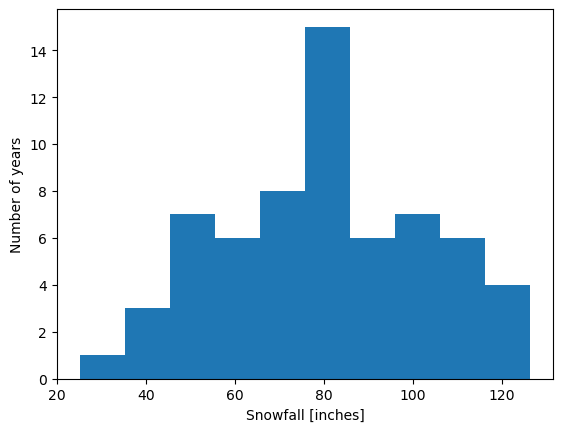

In [12]:
plt.hist(snowfall_data)

plt.xlabel("Snowfall [inches]")
plt.ylabel("Number of years")
plt.show()

In [13]:
snowfall_data.mean()

80.2968253968254

In [14]:
np.median(snowfall_data)

79.7

In [15]:
snowfall_data.std(ddof=1)

23.71976831915066

In [16]:
snowfall_data = pd.read_table("snowfall.csv", header=None)
snowfall_in_inches = snowfall_data[0]

In [17]:
snowfall_in_inches

0     126.4
1      82.4
2      78.1
3      51.1
4      90.9
      ...  
58     66.1
59     78.4
60    120.5
61     97.0
62    110.0
Name: 0, Length: 63, dtype: float64

In [18]:
np.mean(snowfall_in_inches)

80.29682539682538

In [19]:
snowfall_in_inches.std(ddof=1) # correct in pandas, ddof=1 by default, 1/n-1

23.71976831915066

In [20]:
snowfall_in_inches.median()

79.7

In [21]:
snowfall_in_inches.mode()[0]

82.4

<AxesSubplot:>

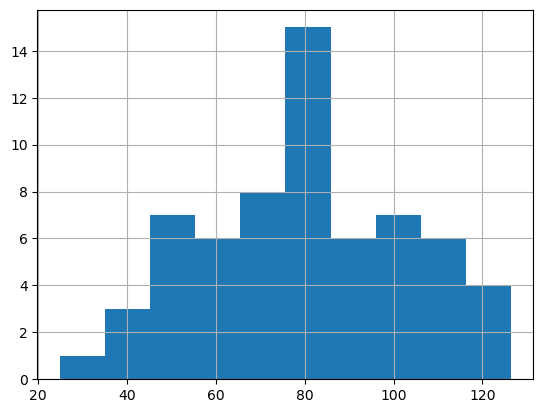

In [22]:
snowfall_in_inches.hist()

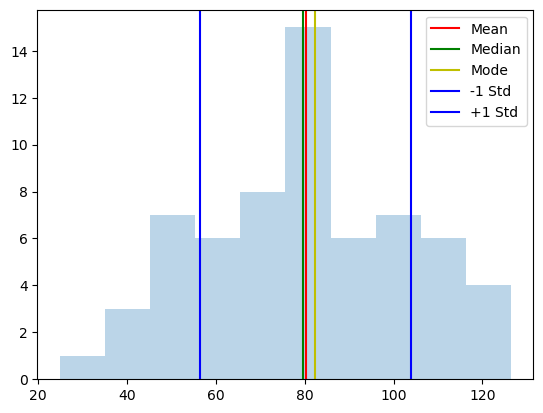

In [23]:
plt.hist(snowfall_in_inches, alpha=0.3)
snowfall_mean = snowfall_in_inches.mean()
plt.axvline(snowfall_mean, c="r", label="Mean")
plt.axvline(snowfall_in_inches.median(), c="green", label="Median")
plt.axvline(snowfall_in_inches.mode()[0], c="y", label="Mode")

snowfall_std = snowfall_in_inches.std()
plt.axvline(snowfall_mean - snowfall_std, c="blue", label="-1 Std")
plt.axvline(snowfall_mean + snowfall_std, c="blue", label="+1 Std")
plt.legend()
plt.show()

### Five number summary - Quarters / quartiles, 1/4 of sorted data, IQR - distance

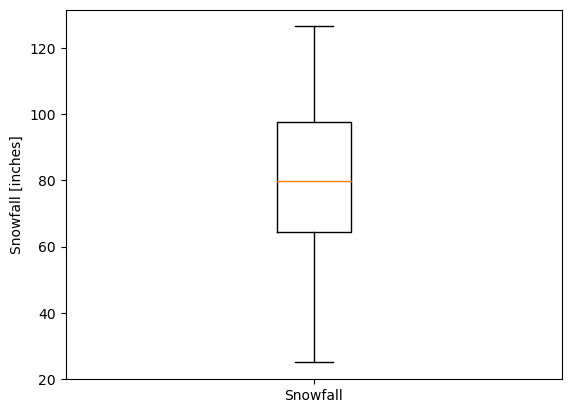

In [24]:
plt.boxplot(snowfall_in_inches)
plt.xticks(ticks=[1], labels=["Snowfall"])
plt.ylabel("Snowfall [inches]")
plt.show()

In [25]:
snowfall_data.skew()

0   -0.018838
dtype: float64

In [26]:
snowfall_data.kurt()

0   -0.562077
dtype: float64

### Scatter plot

### One variable is in correlation with the other, one is function of the other or
### one is dependent on the other (independent) => Birth rate is dependant of time

In [27]:
birth_rates = pd.read_table("birth_rates.csv")

(array([3., 7., 4., 4., 1., 3., 4., 6., 6., 2., 2., 2., 2., 1., 1., 2., 2.,
        1., 1., 5.]),
 array([118.5  , 126.015, 133.53 , 141.045, 148.56 , 156.075, 163.59 ,
        171.105, 178.62 , 186.135, 193.65 , 201.165, 208.68 , 216.195,
        223.71 , 231.225, 238.74 , 246.255, 253.77 , 261.285, 268.8  ]),
 <BarContainer object of 20 artists>)

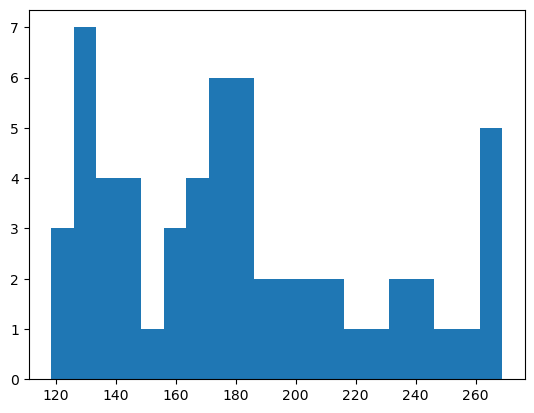

In [28]:
plt.hist(birth_rates["Birthrate"], bins=20)

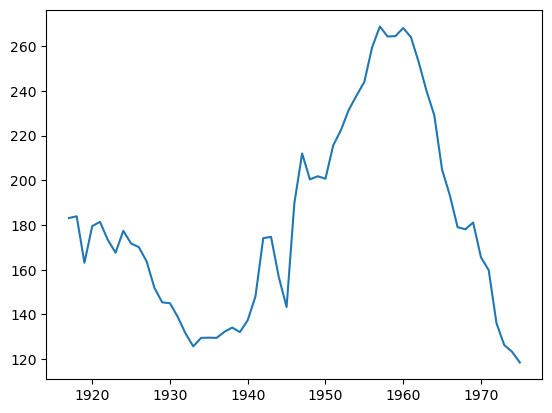

In [29]:
plt.plot(birth_rates["Year"], birth_rates["Birthrate"])
plt.show()

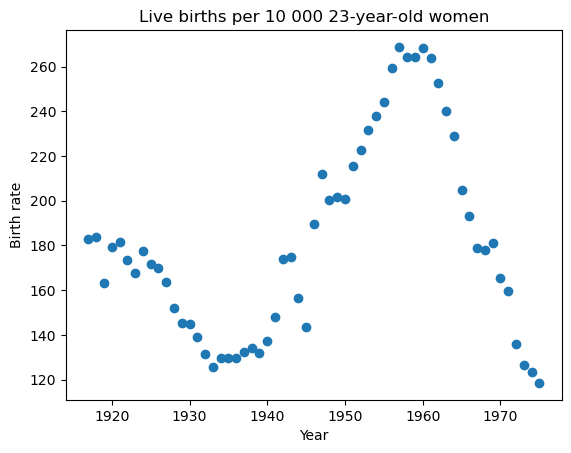

In [30]:
plt.scatter(birth_rates["Year"], birth_rates["Birthrate"])
plt.xlabel("Year")
plt.ylabel("Birth rate")
plt.title("Live births per 10 000 23-year-old women")
plt.show()

### Transformations in the plot


In [31]:
brain_weight = pd.read_table("brain_weight.csv")

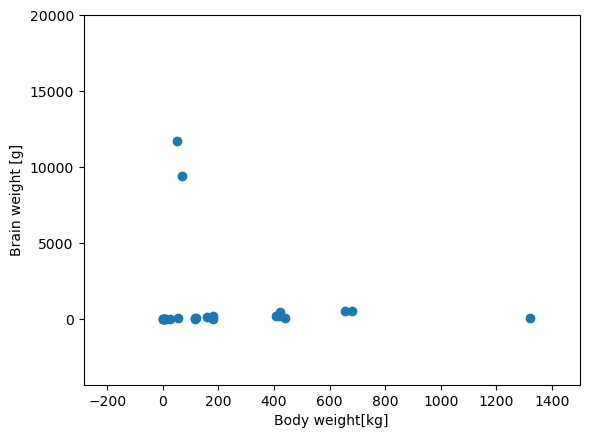

In [32]:
plt.scatter(brain_weight["body"], brain_weight["brain"])
plt.xlim([plt.gca().get_xlim()[0], 1500])
plt.ylim([plt.gca().get_ylim()[0], 20000])


plt.xlabel("Body weight[kg]")
plt.ylabel("Brain weight [g]")
plt.show()

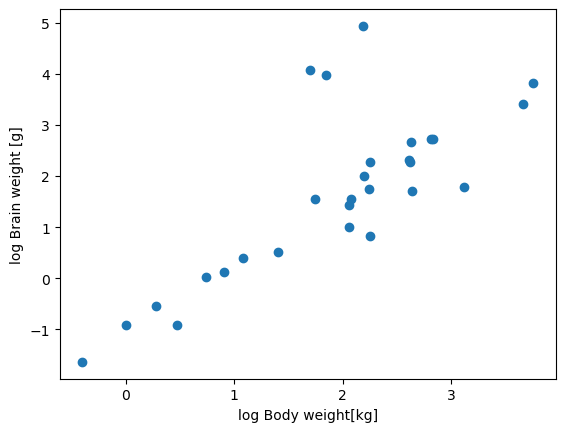

In [33]:
plt.scatter(np.log10(brain_weight["body"]), np.log10(brain_weight["brain"]))

plt.xlabel("log Body weight[kg]")
plt.ylabel("log Brain weight [g]")
plt.show()